Import statments, read in data files

In [ ]:
import numpy as np
import pandas as pd

# store file name(s) as strings
abalone_filename = 'abalone.tsv'
weather_filename = 'boston-TMAX.tsv'
sbux_filename = 'SBUX.csv'
# read the data files:
df_abalone = pd.read_csv(abalone_filename, sep='\t')
df_weather = pd.read_csv(weather_filename, sep='\t')
df_sbux = pd.read_csv(sbux_filename)

Pandas DataFrame basics:
- inspect dataframe, head, tail, columns, rows
- index, indexing by numeric index, slicing
- query method
- boolean filters

In [49]:
# print(df_abalone) # printing only first 5 and last 5
# print(df_abalone.head(10))
# print(df_abalone.tail(10))
print(df_abalone.columns)
# columns = ['Sex', 'Length', 'Diameter', ]
columns = [c for c in df_abalone.columns if 't' in c] # columns containing 't'
# print(df_abalone[columns]) # only these columns

# indexing: retrieve a single record by its numeric index
# print(df_abalone.loc[977])

# slicing: retrieve a subset of the records by index:
# print(df_abalone.loc[977:979]) # notice: inclusive of both start and end

# slice some columns and some rows
# print(df_abalone[columns].loc[977:979])

# df = df_abalone.query('Sex == "M"') # return a new DataFrame with results
# df['Length'].loc[0] = 99 # change an element in the data frame called df
# print(df) # shows that we changed one element/value

# print(df_abalone.loc[[0]]) # shows that the original data frame was not changed.


# df = df_abalone.query('Sex == "M"').query('Height < 0.1') # LOGICAL AND OPERATION
# df = df_abalone.query('Sex == "M" or Height < 0.1') # LOGICAL OR OPERATION (MATCH EITHER CONDITION)

# generate 2 results and combine them
# df1 = df_abalone.query('Sex == "M"')
# df2 = df_abalone.query('Height < 0.1')
# df = pd.concat([df1, df2])
# filter = df.duplicated() # a column of boolean values
# print(df[filter]) # shows the records for which the filter was True

# TO DO: show records with missing values
# print(df.isna().sum())

# a column of booleans by some condition:
filter = df_abalone['Sex'] == 'I'
print(filter.head(20))
print(df_abalone[filter]) # apply the filter condition



Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')
     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
16     I   0.355     0.280   0.085        0.2905          0.0950   
21     I   0.380     0.275   0.100        0.2255          0.0800   
42     I   0.240     0.175   0.045        0.0700          0.0315   
...   ..     ...       ...     ...           ...             ...   
4158   I   0.480     0.355   0.110        0.4495          0.2010   
4163   I   0.390     0.310   0.085        0.3440          0.1810   
4164   I   0.390     0.290   0.100        0.2845          0.1255   
4165   I   0.405     0.300   0.085        0.3035          0.1500   
4166   I   0.475     0.365   0.115        0.4990          0.2320   

      Viscera_weight  Shell_we

Weather data:
- time series index, indexing/slicing operations
- plots
- compute columns
- rolling statistics + bands

<AxesSubplot:xlabel='date'>

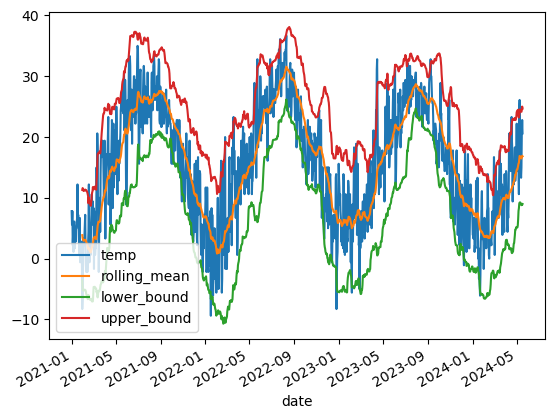

In [68]:
# set the date column as the index
# df_weather.index = df_weather['date']
df_weather.index = pd.to_datetime(df_weather['date'])
# print(df_weather)
# indexing 2 ways: by numeric index or by date:
# print(df_weather.loc['2024-01-01']) # by date string
# print(df_weather.iloc[10858]) # by numeric index
# 
df = df_weather.loc['2021-01-01':'2024-12-31']
temps = df['value'] / 10 # extract a columns (of Series)
rolling_mean = temps.rolling(30).mean()
# look up ix?
# print(df)
# temps.plot()
# rolling_mean.plot()

# create a new DataFrame to hold results:
df_results = pd.DataFrame(index=df.index)
df_results['temp'] = temps # copying a Series into this column in the DataFrame
df_results['rolling_mean'] = df_results['temp'].rolling(30).mean()
df_results['lower_bound'] = df_results['rolling_mean'] - 2 * df_results['temp'].rolling(30).std() # std deviation
df_results['upper_bound'] = df_results['rolling_mean'] + 2 * df_results['temp'].rolling(30).std() # std deviation
# print(df_results)
df_results.plot()


Example with stock price data:
using data file SBUX.csv
the data file contains daily price information with 5 years of data

<AxesSubplot:xlabel='Date'>

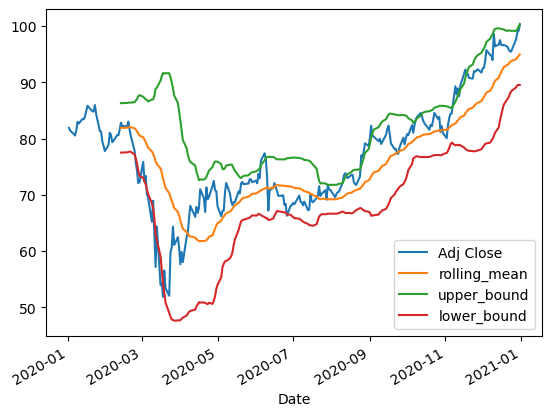

In [77]:
# print(df_sbux)
df_sbux.index = pd.to_datetime(df_sbux['Date']) # set the index
df_sbux = df_sbux.loc['2020-01-01':'2020-12-31'] # slice out one year
df_sbux['rolling_mean'] = df_sbux['Adj Close'].rolling(30).mean() # calculate rolling mean
df_sbux['lower_bound'] = df_sbux['rolling_mean'] - 2 * df_sbux['Adj Close'].rolling(30).std() # std deviation
df_sbux['upper_bound'] = df_sbux['rolling_mean'] + 2 * df_sbux['Adj Close'].rolling(30).std() # std deviation

df_sbux[['Adj Close','rolling_mean', 'upper_bound', 'lower_bound']].plot()
